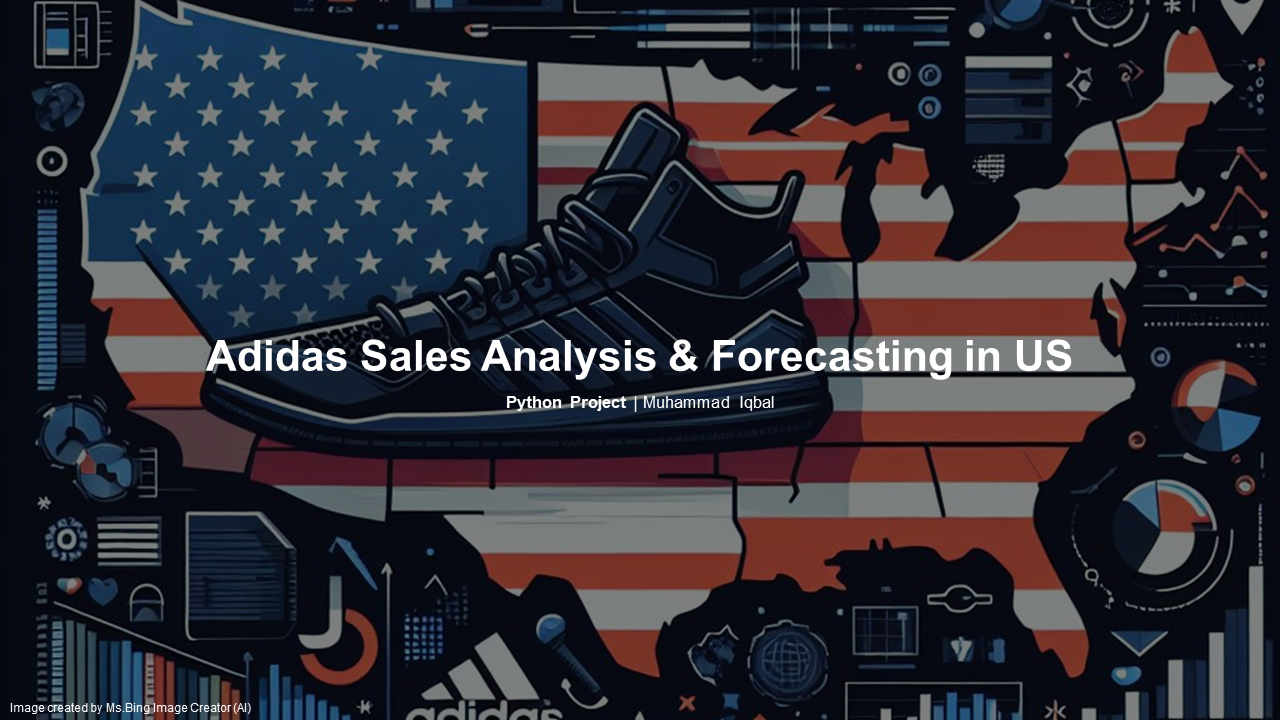

**Problem Statement**

In navigating the dynamic retail landscape of the United States, Adidas faces the imperative to conduct a comprehensive analysis of sales and forecasting to comprehend market trends, influential factors, and future growth potential. Presently, the company encounters several challenges, including fluctuating customer demand, seasonal variations, and intense competition within the footwear and sportswear industry. Uncertainties in evolving consumer trends and external factors that may impact sales necessitate an innovative and targeted solution. Therefore, the objective of this project is to compile an in-depth analysis of past sales data, identifying patterns and key factors influencing Adidas sales in the United States. This project also aims to develop an accurate and reliable forecasting model, leveraging machine learning techniques and statistical analysis. Thus, the company can make informed decisions regarding inventory, marketing, and sales strategies, minimizing risks and enhancing operational efficiency. Through a better understanding of consumer behavior, market trends, and potential risk factors, Adidas expects to optimize their sales strategies, increase market share, and achieve sustainable growth in the U.S. market.

- The dataset utilized originates from Kaggle ([Here](https://www.kaggle.com/datasets/bcnishantreddy/adidas-us-sales-datasets)).

**Research Questions**
1. What is the overall sales performance in Adidas product and retailer in the US?
2. What is the overall trend in Adidas sales in the US over the specified time period?
3. Is there a variation in product preferences at each retailer and which retailer in the US contributes the most to Adidas profit for each product?
4. Which city, state, and region in the US contribute the most to Adidas sales, and are there any regional variations in product preferences?
5. Is there a correlation between the Units Sold, Total Sales, and Operating Profit for Adidas products in the US?
6. What is the most effective sales method to use, and what is the variation in sales methods for Adidas across different retailers?
7. How to sales Forecast w/ Arima, Sarima, & ExponentialSmoothing Holt-Winters?

# **Library and Explore Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'Adidas US Sales Datasets.xlsx',skiprows = 4)

In [3]:
df

,Unnamed: 0,Retailer,Retailer ID,Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [4]:
data = df.drop('Unnamed: 0', axis=1)

In [5]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Date                0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Date                0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Date              9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name().str[:3]
data['year']=data['Date'].dt.year

In [10]:
data.describe()

,Retailer ID,Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.865050
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.341688


In [11]:
data

,Retailer,Retailer ID,Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,Jan,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,Jan,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,Jan,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,Jan,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,Jan,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,Jan,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,Jan,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,Feb,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,Feb,2021


In [12]:
data.columns

Index(['Retailer', 'Retailer ID', 'Date', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Sales Method', 'Month', 'year'],
      dtype='object')

# **What is the overall sales performance in Adidas product and retailer in the US**

Top Products

In [13]:
top_product_overall = data.groupby('Product')[['Units Sold', 'Total Sales', 'Operating Profit']].sum().reset_index()
top_sold = top_product_overall.sort_values(by='Units Sold', ascending=False)
top_sales = top_product_overall.sort_values(by='Total Sales', ascending=False)
top_profit = top_product_overall.sort_values(by='Operating Profit', ascending=False)

In [14]:
top_sold

,Product,Units Sold,Total Sales,Operating Profit
2,Men's Street Footwear,593320,208826244.0,82802260.62
1,Men's Athletic Footwear,435526,153673680.0,51846888.19
3,Women's Apparel,433827,179038860.0,68650970.56
5,Women's Street Footwear,392269,128002813.0,45095826.81
4,Women's Athletic Footwear,317236,106631896.0,38975784.94
0,Men's Apparel,306683,123728632.0,44763030.33


In [15]:
top_sales

,Product,Units Sold,Total Sales,Operating Profit
2,Men's Street Footwear,593320,208826244.0,82802260.62
3,Women's Apparel,433827,179038860.0,68650970.56
1,Men's Athletic Footwear,435526,153673680.0,51846888.19
5,Women's Street Footwear,392269,128002813.0,45095826.81
0,Men's Apparel,306683,123728632.0,44763030.33
4,Women's Athletic Footwear,317236,106631896.0,38975784.94


In [16]:
top_profit

,Product,Units Sold,Total Sales,Operating Profit
2,Men's Street Footwear,593320,208826244.0,82802260.62
3,Women's Apparel,433827,179038860.0,68650970.56
1,Men's Athletic Footwear,435526,153673680.0,51846888.19
5,Women's Street Footwear,392269,128002813.0,45095826.81
0,Men's Apparel,306683,123728632.0,44763030.33
4,Women's Athletic Footwear,317236,106631896.0,38975784.94


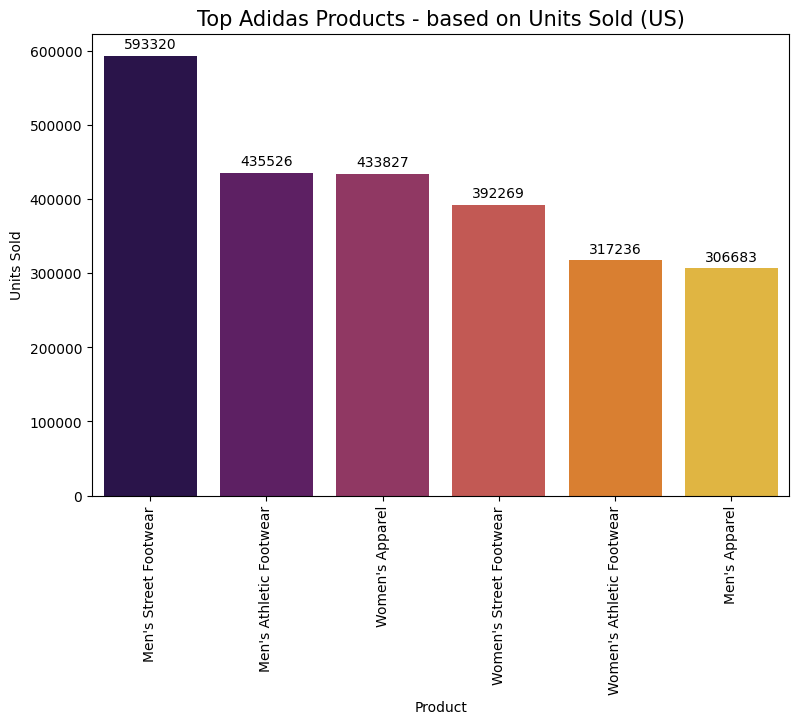

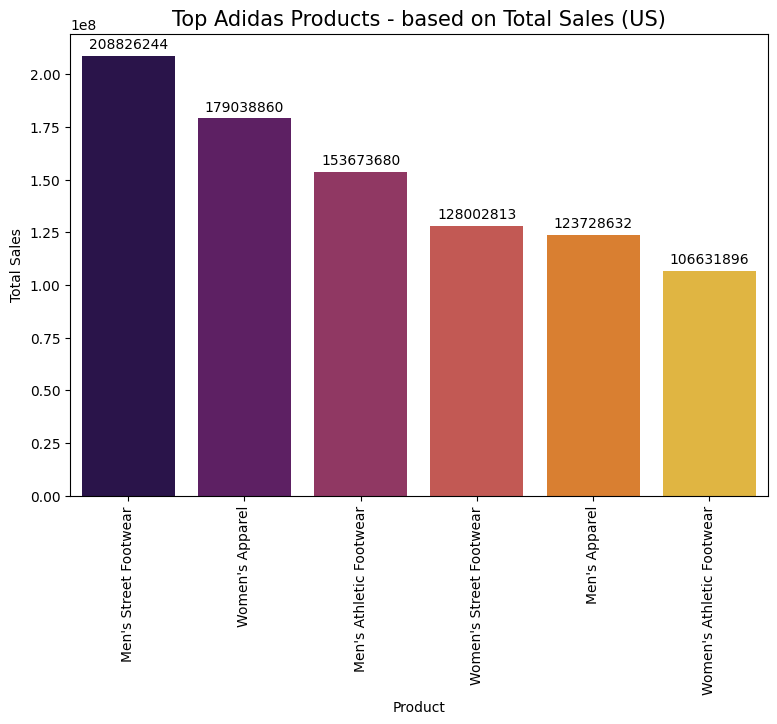

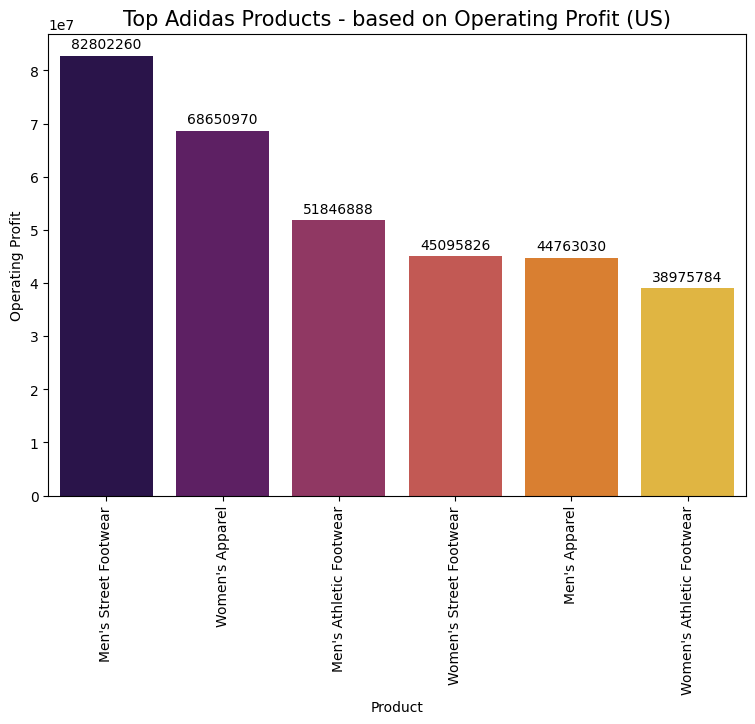

In [17]:
variables = ['Units Sold', 'Total Sales', 'Operating Profit']

for variable in variables:
    top_variable = top_product_overall.sort_values(by=variable, ascending=False)
    
    plt.figure(figsize=(9, 6))
    ax = sns.barplot(data=top_variable, x='Product', y=variable, palette='inferno')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
    
    plt.xticks(rotation=90)
    plt.title(f"Top Adidas Products - based on {variable} (US)", size=15)
    plt.show()

Top Retailer

In [18]:
salesby_retail = data.groupby('Retailer')[['Total Sales', 'Operating Profit']].sum().reset_index()
retail = salesby_retail.sort_values(by='Total Sales', ascending=False)
retail

,Retailer,Total Sales,Operating Profit
5,West Gear,242964333.0,85667873.18
1,Foot Locker,220094720.0,80722124.81
3,Sports Direct,182470997.0,74332954.96
2,Kohl's,102114753.0,36811252.58
0,Amazon,77698912.0,28818503.31
4,Walmart,74558410.0,25782052.61


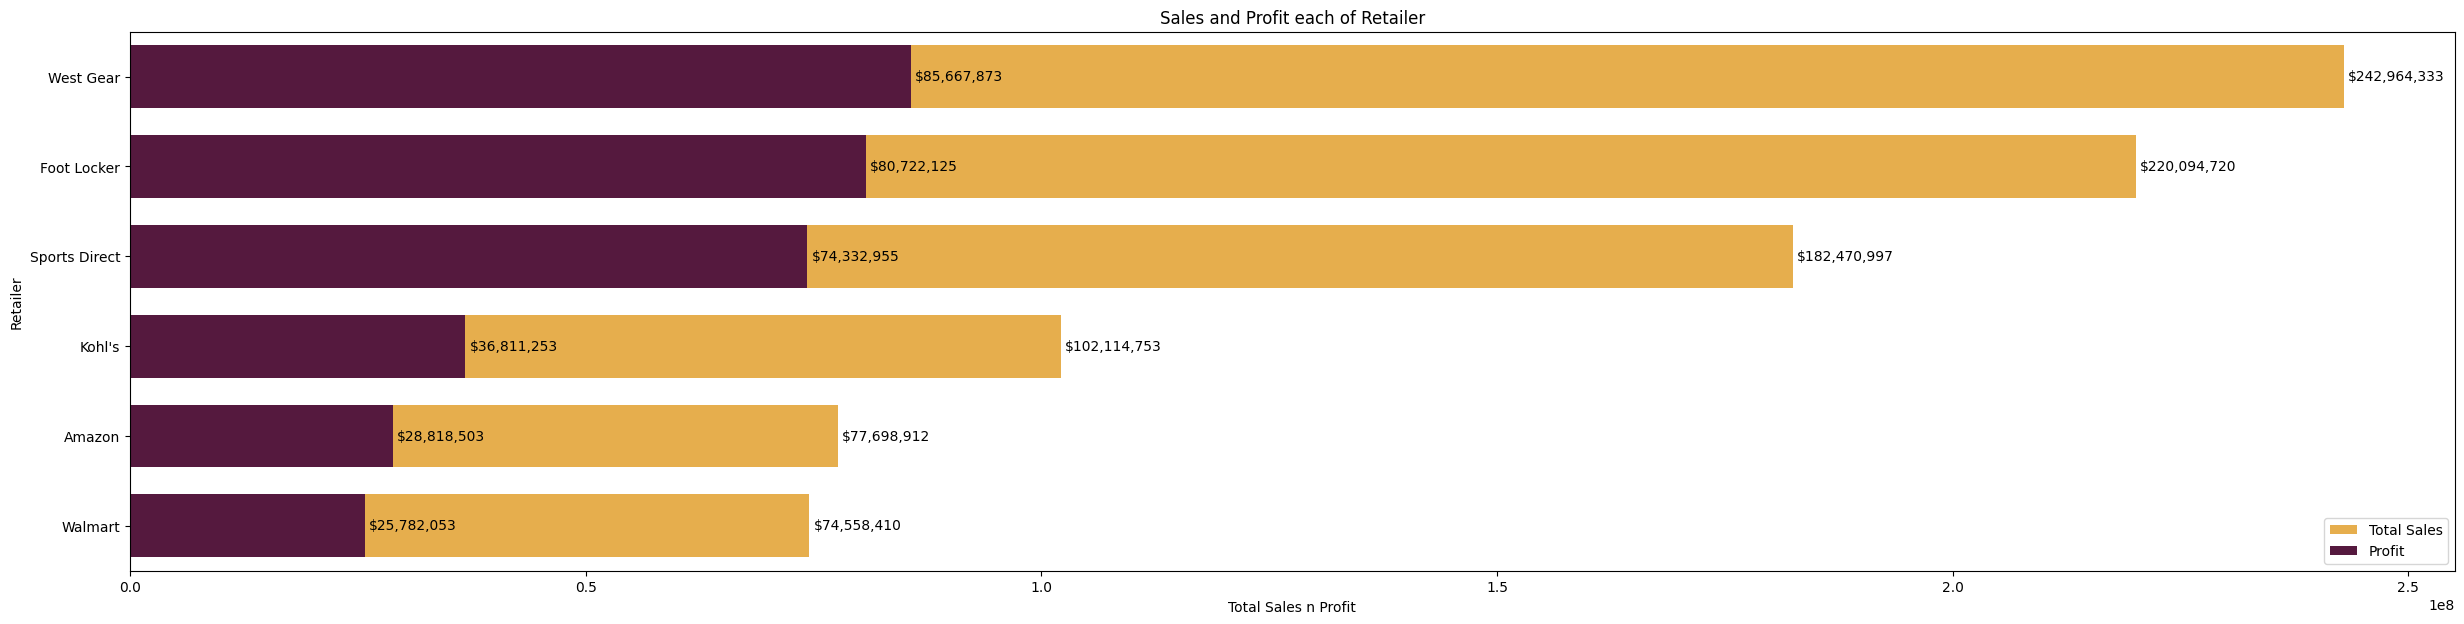

In [19]:
plt.figure(figsize=(30, 7))
ax = sns.barplot(y='Retailer', x='Total Sales', data=retail, color='#FFB534', edgecolor='none', width=0.7, label='Total Sales')
ax = sns.barplot(y='Retailer', x='Operating Profit', data=retail, color='#5F0F40', edgecolor='none', width=0.7,  label='Profit')

def dollar_format(x, pos):
    return f"${x:,.0f}"
for container in ax.containers:
    ax.bar_label(container, fmt=FuncFormatter(dollar_format), fontsize=10, color='black', label_type='edge', padding=3)

ax.set(title='Sales and Profit each of Retailer')
ax.set(ylabel='Retailer', xlabel='Total Sales n Profit')
plt.show()


# **What is the overall trend in Adidas sales in the US over the specified time period?**

Monthwise Sales and Profit

In [20]:
Monthwise_profit = data.groupby('Month')[['Operating Profit', 'Total Sales']].sum().reset_index().sort_values(by='Month', ascending=False)
Monthwise_profit

,Month,Operating Profit,Total Sales
11,Sep,31009586.73,77661459.0
10,Oct,25078444.60,63911033.0
9,Nov,24755521.43,67857340.0
8,May,29946255.33,80507695.0
7,Mar,20439788.00,56809109.0
6,Jun,26714715.92,74747372.0
5,Jul,34054898.59,95480694.0
4,Jan,25141934.51,71479142.0
3,Feb,21392736.70,61100153.0
2,Dec,31590202.03,85841957.0


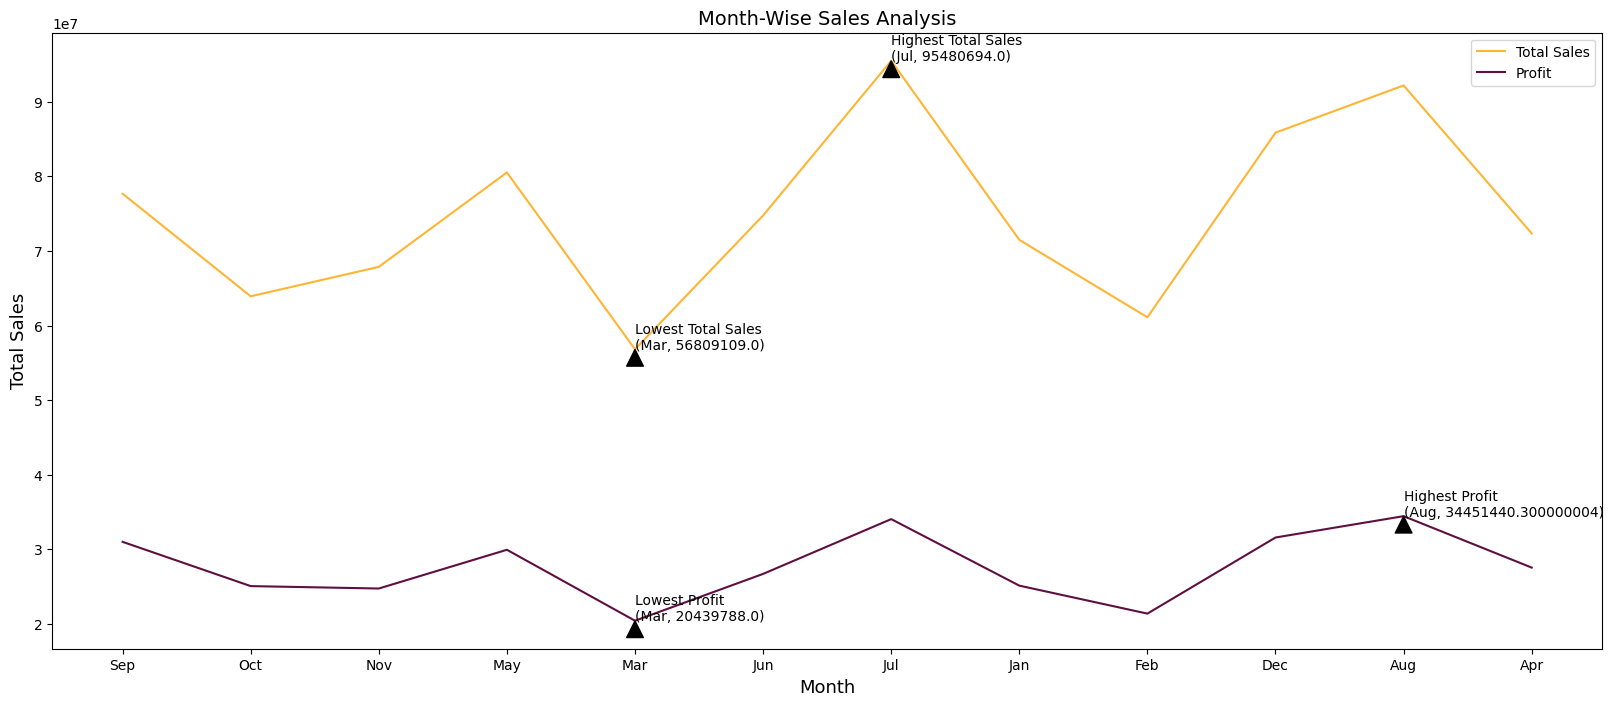

In [21]:
plt.figure(figsize=(20, 8))

sns.lineplot(x='Month', y='Total Sales', data=Monthwise_profit, color='#FFB534', label='Total Sales')
sns.lineplot(x='Month', y='Operating Profit', data=Monthwise_profit, color='#5F0F40', label='Profit')

max_total_sales = Monthwise_profit.loc[Monthwise_profit['Total Sales'].idxmax()]
min_total_sales = Monthwise_profit.loc[Monthwise_profit['Total Sales'].idxmin()]

max_operating_profit = Monthwise_profit.loc[Monthwise_profit['Operating Profit'].idxmax()]
min_operating_profit = Monthwise_profit.loc[Monthwise_profit['Operating Profit'].idxmin()]

plt.annotate(f'Highest Total Sales\n({max_total_sales["Month"]}, {max_total_sales["Total Sales"]})',
             xy=(max_total_sales['Month'], max_total_sales['Total Sales']),
             xytext=(max_total_sales['Month'], max_total_sales['Total Sales'] + 500), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='black')

plt.annotate(f'Lowest Total Sales\n({min_total_sales["Month"]}, {min_total_sales["Total Sales"]})',
             xy=(min_total_sales['Month'], min_total_sales['Total Sales']),
             xytext=(min_total_sales['Month'], min_total_sales['Total Sales'] - 500),  
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='black')

plt.annotate(f'Highest Profit\n({max_operating_profit["Month"]}, {max_operating_profit["Operating Profit"]})',
             xy=(max_operating_profit['Month'], max_operating_profit['Operating Profit']),
             xytext=(max_operating_profit['Month'], max_operating_profit['Operating Profit'] + 500), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='black')

plt.annotate(f'Lowest Profit\n({min_operating_profit["Month"]}, {min_operating_profit["Operating Profit"]})',
             xy=(min_operating_profit['Month'], min_operating_profit['Operating Profit']),
             xytext=(min_operating_profit['Month'], min_operating_profit['Operating Profit'] - 500),  
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='black')

plt.title('Month-Wise Sales Analysis', fontsize=14)
plt.xlabel('Month', size=13)
plt.ylabel('Total Sales', size=13)
plt.legend()
plt.show()

Yearwise Product Sales and Profit

In [22]:
yearwise= data.groupby(['year', 'Product'])[['Operating Profit', 'Total Sales']].sum().reset_index()
yearwise

,year,Product,Operating Profit,Total Sales
0,2020,Men's Apparel,9660070.37,26216964.0
1,2020,Men's Athletic Footwear,9359256.91,31794462.0
2,2020,Men's Street Footwear,15558837.44,37823020.0
3,2020,Women's Apparel,11302905.22,35190332.0
4,2020,Women's Athletic Footwear,8290741.17,23629892.0
5,2020,Women's Street Footwear,9203851.47,27426005.0
6,2021,Men's Apparel,35102959.96,97511668.0
7,2021,Men's Athletic Footwear,42487631.28,121879218.0
8,2021,Men's Street Footwear,67243423.18,171003224.0
9,2021,Women's Apparel,57348065.34,143848528.0


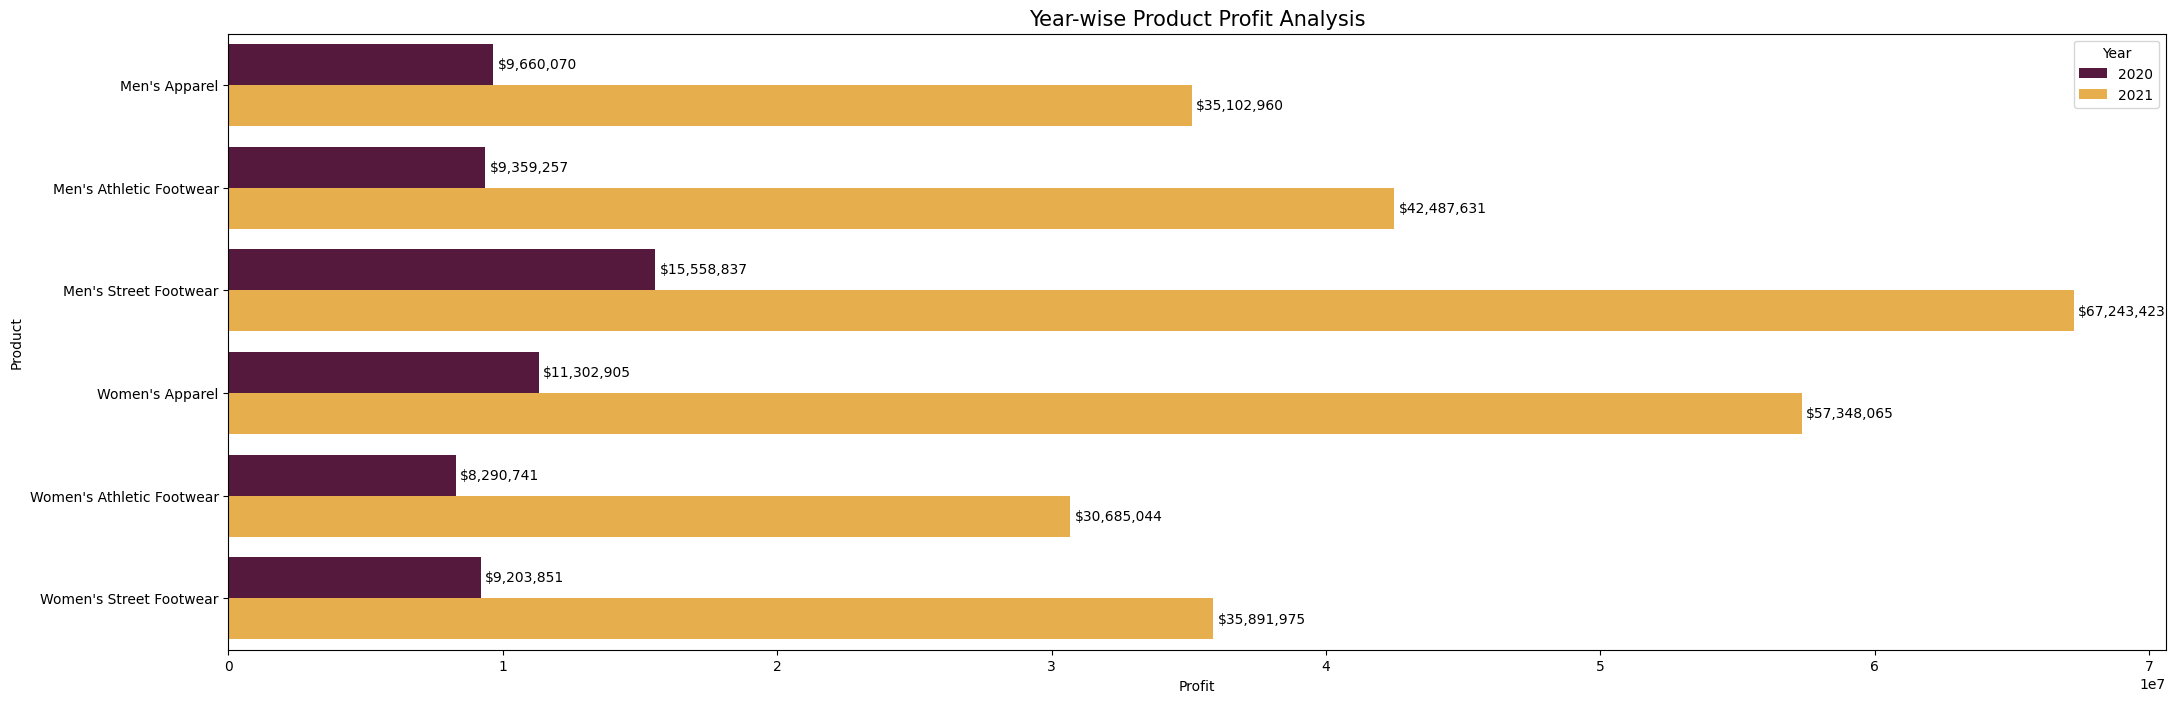

In [23]:
custom_palette = ['#5F0F40', '#FFB534']

plt.figure(figsize=(25, 8)) 

ax = sns.barplot(x='Operating Profit', y='Product', hue='year', data=yearwise, palette=custom_palette)

def dollar_format(x, pos):
    return f"${x:,.0f}"
for container in ax.containers:
    ax.bar_label(container, fmt=FuncFormatter(dollar_format), fontsize=10, color='black', label_type='edge', padding=3)

plt.title('Year-wise Product Profit Analysis', fontsize=15)
plt.ylabel('Product')
plt.xlabel('Profit')
plt.legend(title='Year')
plt.show()


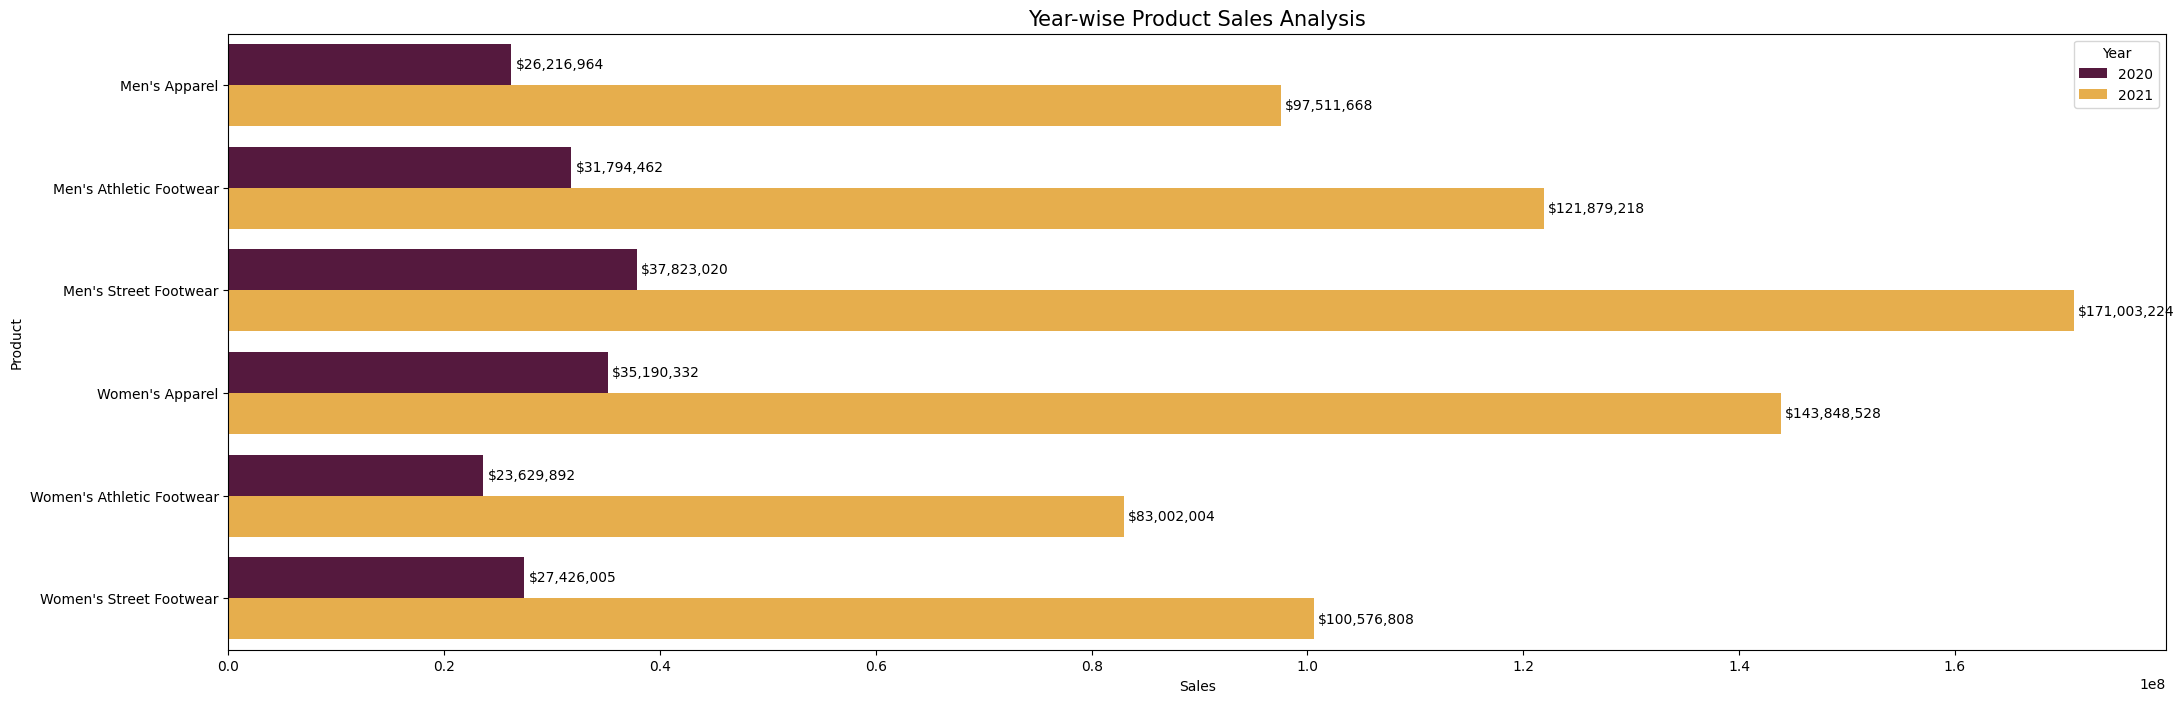

In [24]:
plt.figure(figsize=(25, 8)) 

ax = sns.barplot(x='Total Sales', y='Product', hue='year', data=yearwise, palette=custom_palette)

def dollar_format(x, pos):
    return f"${x:,.0f}"
for container in ax.containers:
    ax.bar_label(container, fmt=FuncFormatter(dollar_format), fontsize=10, color='black', label_type='edge', padding=3)

plt.title('Year-wise Product Sales Analysis', fontsize=15)
plt.ylabel('Product')
plt.xlabel('Sales')
plt.legend(title='Year')
plt.show()

# **Is there a variation in product preferences at each retailer and which retailer in the US contributes the most to Adidas profit for each product?**

In [25]:
top_product_retail = data.groupby(['Retailer', 'Product'])[['Units Sold', 'Operating Profit']].sum().reset_index()
top_sold_retail = top_product_retail.sort_values(by=['Product', 'Units Sold'], ascending=False)
top_profit_retail = top_product_retail.sort_values(by=['Product','Operating Profit'], ascending=False)
top_sold_retail

,Retailer,Product,Units Sold,Operating Profit
35,West Gear,Women's Street Footwear,101289,12548955.14
11,Foot Locker,Women's Street Footwear,92385,9639474.32
23,Sports Direct,Women's Street Footwear,92311,10313909.95
17,Kohl's,Women's Street Footwear,45910,5753761.30
29,Walmart,Women's Street Footwear,31745,3560034.09
5,Amazon,Women's Street Footwear,28629,3279692.01
34,West Gear,Women's Athletic Footwear,82539,10298371.50
22,Sports Direct,Women's Athletic Footwear,73697,9688746.39
10,Foot Locker,Women's Athletic Footwear,73104,8477313.73
16,Kohl's,Women's Athletic Footwear,38517,4570693.09


In [26]:
top_profit_retail

,Retailer,Product,Units Sold,Operating Profit
35,West Gear,Women's Street Footwear,101289,12548955.14
23,Sports Direct,Women's Street Footwear,92311,10313909.95
11,Foot Locker,Women's Street Footwear,92385,9639474.32
17,Kohl's,Women's Street Footwear,45910,5753761.30
29,Walmart,Women's Street Footwear,31745,3560034.09
5,Amazon,Women's Street Footwear,28629,3279692.01
34,West Gear,Women's Athletic Footwear,82539,10298371.50
22,Sports Direct,Women's Athletic Footwear,73697,9688746.39
10,Foot Locker,Women's Athletic Footwear,73104,8477313.73
16,Kohl's,Women's Athletic Footwear,38517,4570693.09


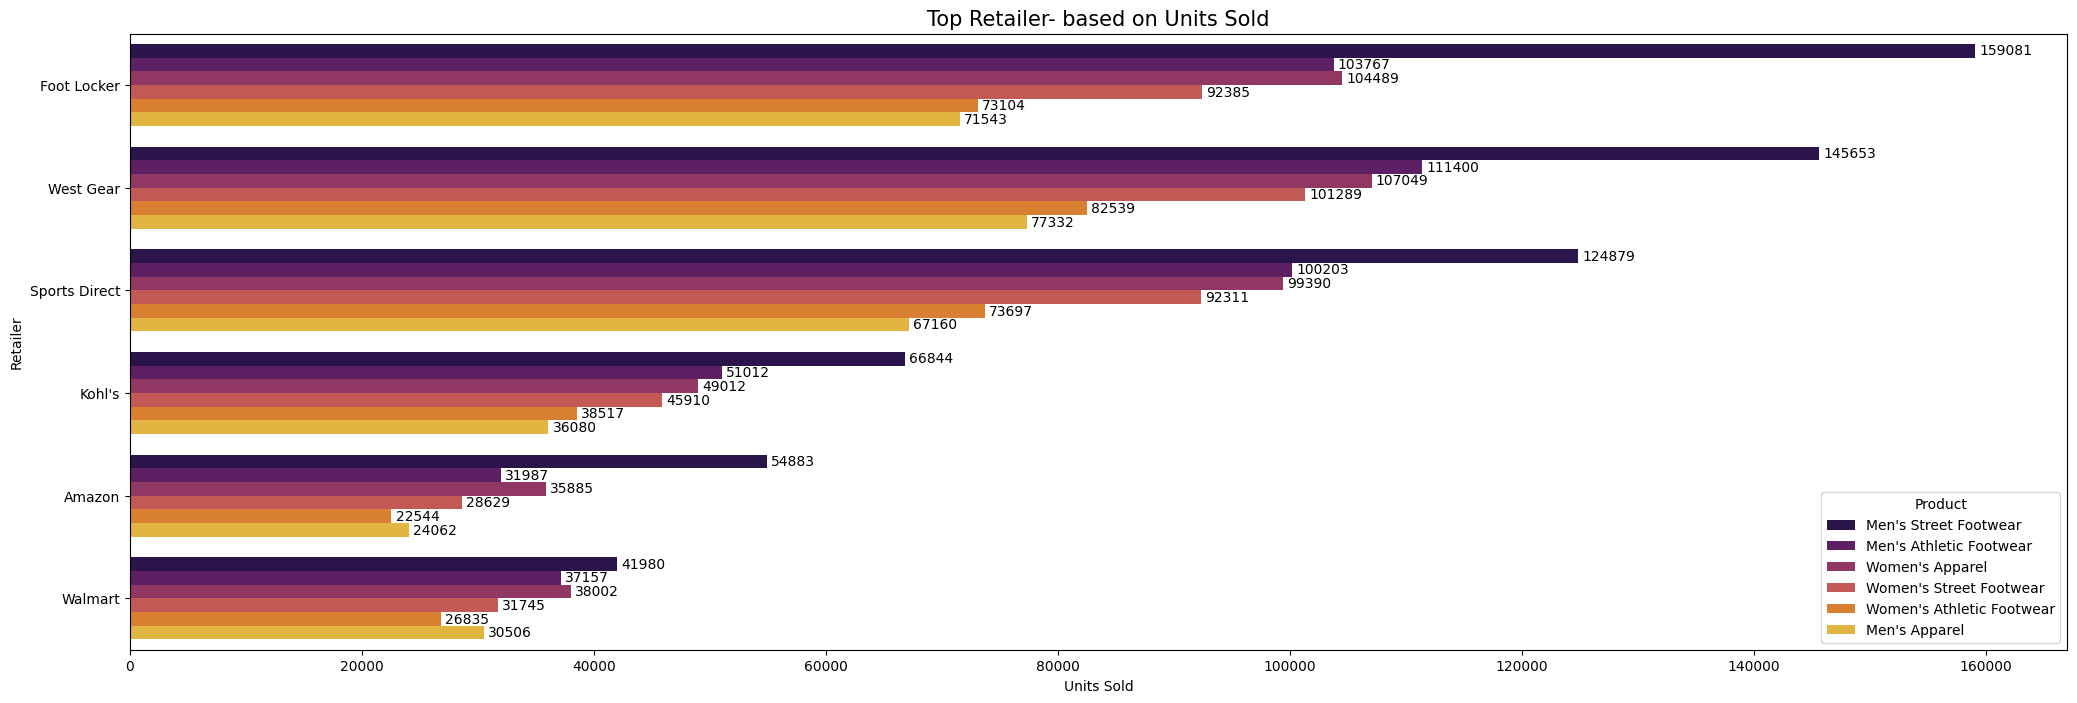

In [27]:
top_variable_retail = top_product_retail.sort_values(by='Units Sold', ascending=False)

# Plotting
plt.figure(figsize=(25, 8))
ax = sns.barplot(y='Retailer', x='Units Sold', hue='Product', data=top_variable_retail, palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)

plt.title(f'Top Retailer- based on Units Sold', fontsize=15)
plt.ylabel('Retailer')
plt.xlabel('Units Sold')
plt.show()

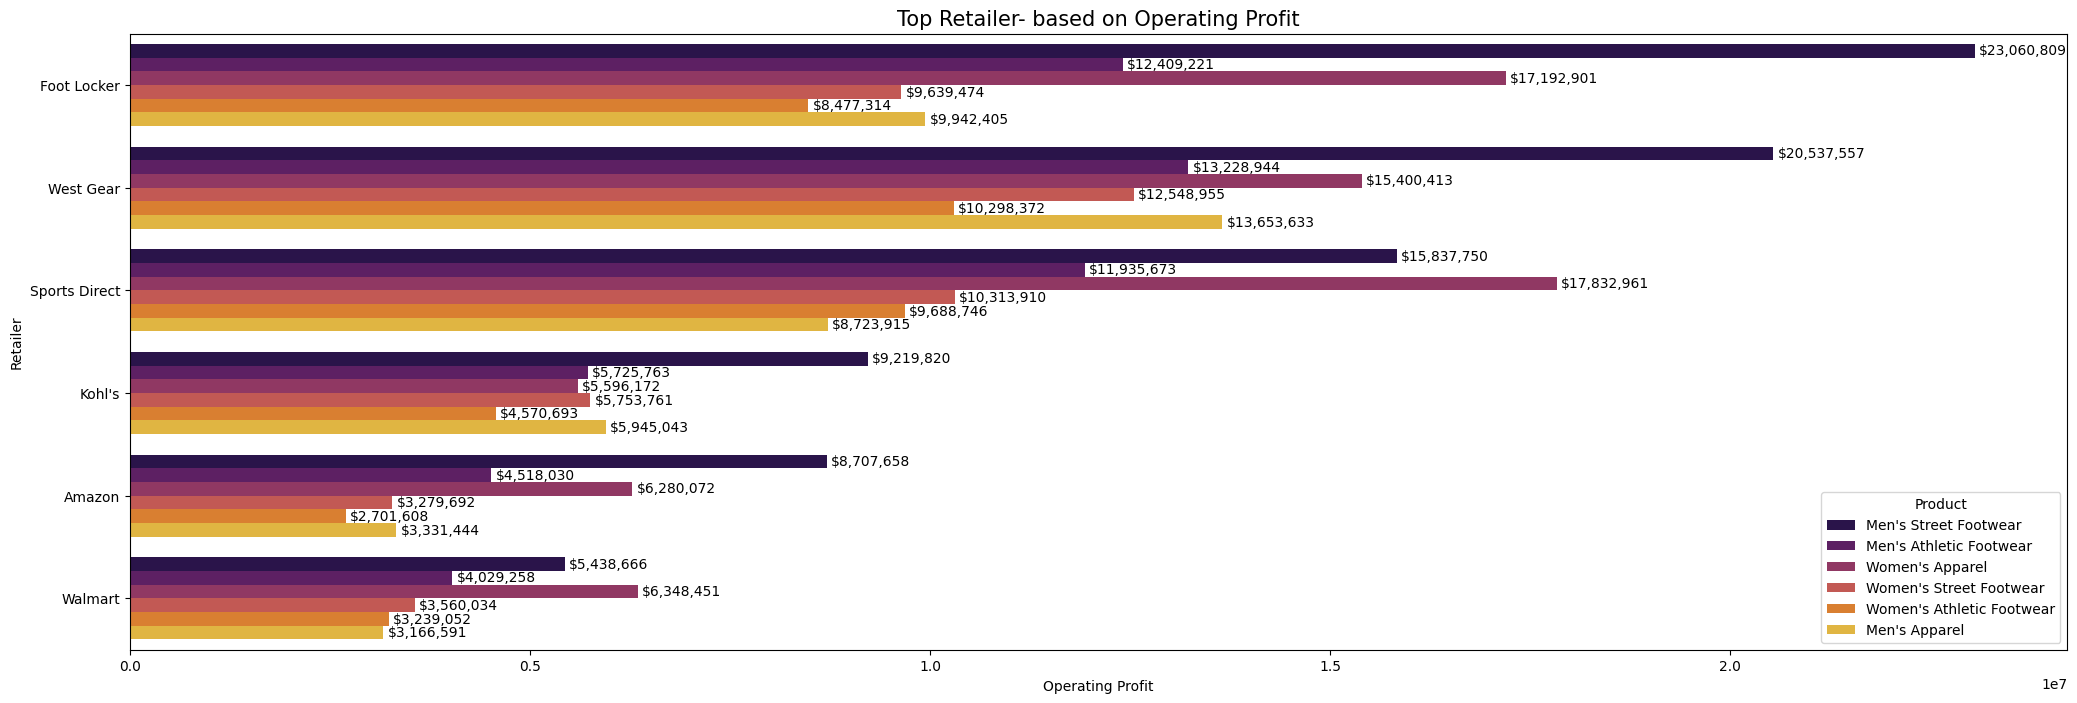

In [28]:
profitable_retail = top_product_retail.sort_values(by='Operating Profit', ascending=False)

plt.figure(figsize=(25, 8))
ax = sns.barplot(y='Retailer', x='Operating Profit', hue='Product', data=top_variable_retail, palette='inferno')
def dollar_format(x, pos):
    return f"${x:,.0f}"
for container in ax.containers:
    ax.bar_label(container, fmt=FuncFormatter(dollar_format), fontsize=10, color='black', label_type='edge', padding=3)

plt.title(f'Top Retailer- based on Operating Profit', fontsize=15)
plt.ylabel('Retailer')
plt.xlabel('Operating Profit')
plt.show()

# **Which city, state, and region in the US contribute the most to Adidas sales, and are there any regional variations in product preferences?**

In [29]:
top_city = data.groupby('City')[['Total Sales']].sum().reset_index().sort_values(by='Total Sales', ascending=False).head(10)
top_city

,City,Total Sales
10,Charleston,39974797.0
35,New York,39801235.0
46,San Francisco,34539220.0
31,Miami,31600863.0
42,Portland,30545652.0
39,Orlando,27682851.0
47,Seattle,26330718.0
28,Los Angeles,25634913.0
22,Houston,25456882.0
0,Albany,24427804.0


Text(0, 0.5, 'City')

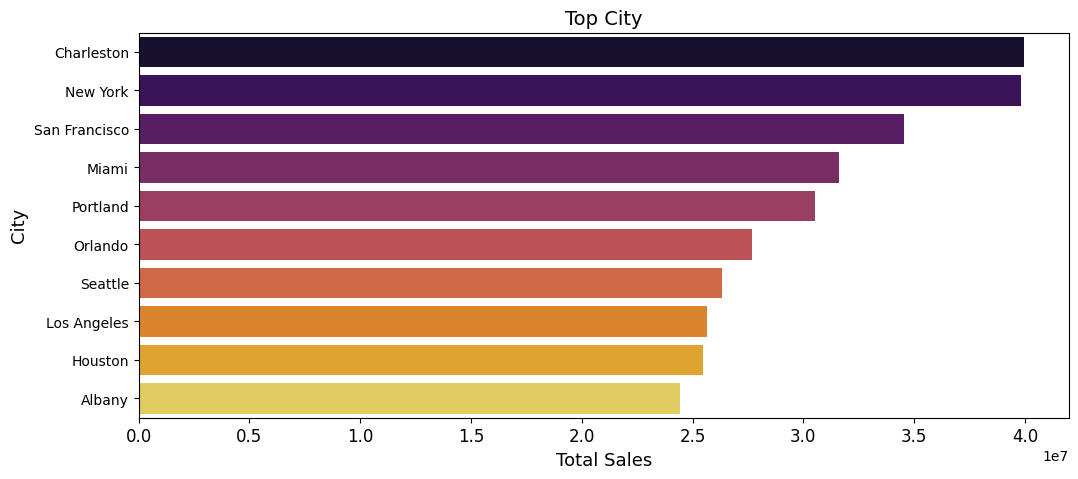

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x='Total Sales',y='City',data=top_city,palette = 'inferno')
plt.xticks(size= 12)
plt.title('Top City',size= 14)
plt.xlabel('Total Sales',size = 13)
plt.ylabel('City',size = 13)

In [31]:
top_state = data.groupby('State')[['Total Sales']].sum().reset_index().sort_values(by='Total Sales', ascending=False).head(10)
top_state

,State,Total Sales
31,New York,64229039.0
4,California,60174133.0
8,Florida,59283714.0
42,Texas,46359746.0
39,South Carolina,29285637.0
46,Washington,26330718.0
32,North Carolina,23956531.0
17,Louisiana,23750781.0
10,Hawaii,22282457.0
45,Virginia,21575040.0


Text(0, 0.5, 'State')

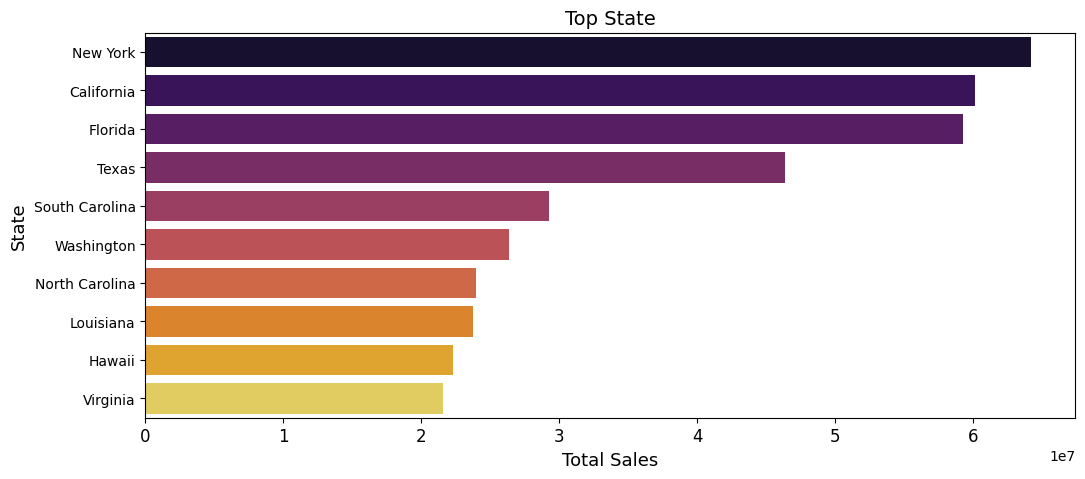

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x='Total Sales',y='State',data=top_state ,palette = 'inferno')
plt.xticks(size= 12)
plt.title('Top State',size= 14)
plt.xlabel('Total Sales',size = 13)
plt.ylabel('State',size = 13)

In [33]:
salesby_region = data.groupby('Region')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)
salesby_region

,Region,Total Sales
4,West,269943182.0
1,Northeast,186324067.0
3,Southeast,163171236.0
2,South,144663181.0
0,Midwest,135800459.0


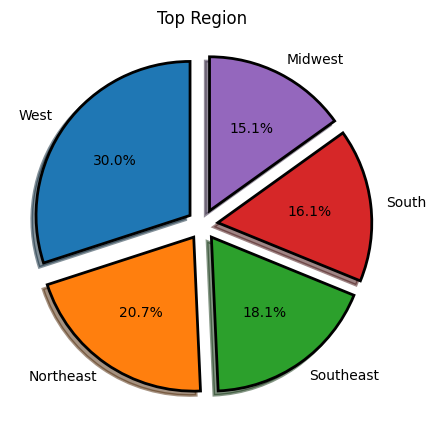

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
wp = {'linewidth': 2, 'edgecolor': 'black'}
explode = (0.1,) * len(salesby_region)

ax.pie(salesby_region['Total Sales'], labels=salesby_region['Region'], autopct='%1.1f%%', 
       shadow=True, startangle=90, wedgeprops=wp, explode=explode)
ax.set_title('Top Region')
plt.show()

In [35]:
product_region = data.groupby(['Region', 'Product'])[['Units Sold', 'Total Sales']].sum()
top_product_region = product_region.sort_values(by='Total Sales', ascending=False)
top_product_region

Units Sold  Total Sales
Region    Product                                           
West      Men's Street Footwear          150795   55014613.0
          Women's Apparel                116765   52191046.0
Northeast Men's Street Footwear          134252   51025024.0
West      Men's Athletic Footwear        127724   50006339.0
          Women's Street Footwear        113705   42520111.0
Midwest   Men's Street Footwear          109861   38322810.0
Northeast Women's Apparel                 90048   37543083.0
Southeast Men's Street Footwear           91867   36019236.0
West      Men's Apparel                   84322   35694003.0
          Women's Athletic Footwear       93674   34517070.0
Southeast Women's Apparel                 68839   31491161.0
South     Women's Apparel                 88740   29607187.0
Northeast Men's Athletic Footwear         81474   28874237.0
South     Men's Street Footwear          106545   28444561.0
Midwest   Women's Apparel                 69435   28206383.0
Southeast Men's Athletic Footwear         71129   27777020.0
Northeast Men's Apparel                   62031   25744412.0
South     Men's Athletic Footwear         90079   25710545.0
Southeast Men's Apparel                   54385   24461487.0
Northeast Women's Street Footwear         74010   23341173.0
Southeast Women's Street Footwear         65488   23119534.0
South     Women's Street Footwear         82257   22777097.0
Midwest   Men's Athletic Footwear         65120   21305539.0
Southeast Women's Athletic Footwear       55292   20302798.0
Northeast Women's Athletic Footwear       59464   19796138.0
South     Men's Apparel                   60641   19703069.0
          Women's Athletic Footwear       63998   18420722.0
Midwest   Men's Apparel                   45304   18125661.0
          Women's Street Footwear         56809   16244898.0
          Women's Athletic Footwear       44808   13595168.0

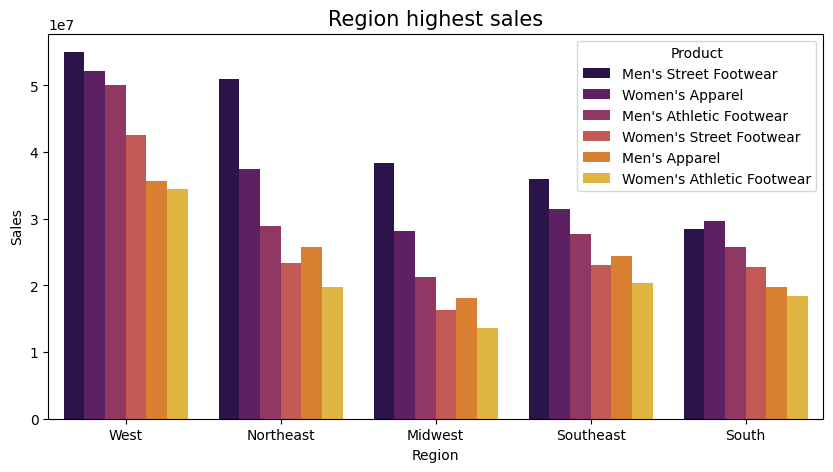

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region' , y= 'Total Sales' , hue = 'Product' , data = top_product_region, palette = 'inferno')
plt.title('Region highest sales',fontsize=15)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# **Is there a correlation between the Units Sold, Total Sales, and Operating Profit for Adidas products in US?**

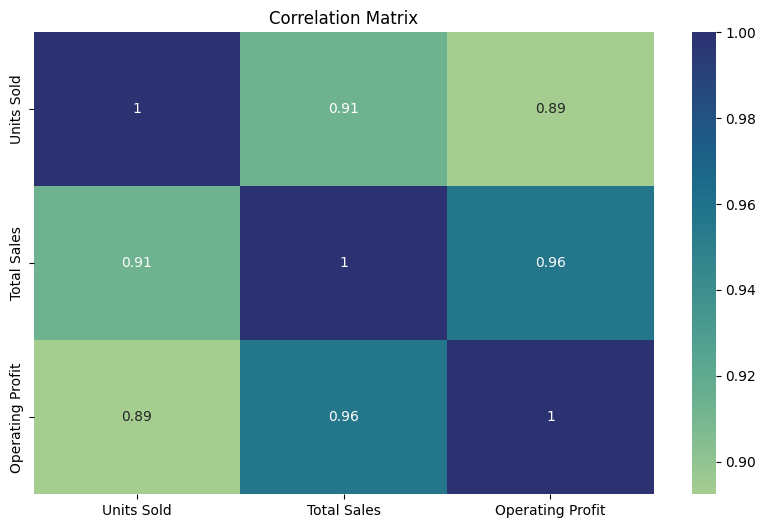

In [37]:
correlation_matrix = df[['Units Sold', 'Total Sales', 'Operating Profit']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

# **What is the most effective sales method to use, and what is the variation in sales methods for Adidas across different retailers?**

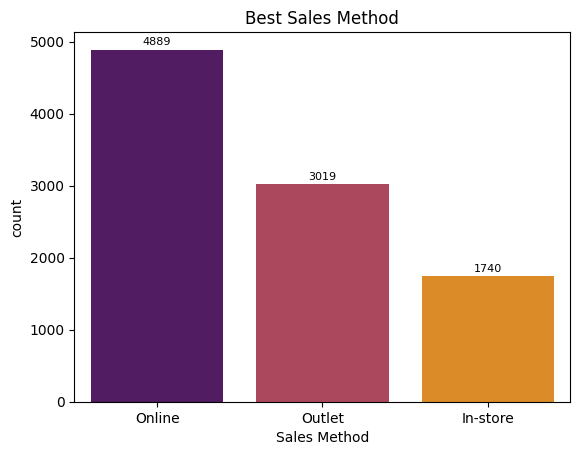

In [38]:
ax = sns.barplot(data=data['Sales Method'].value_counts(), palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, color='black', label_type='edge', padding=2)
plt.title('Best Sales Method')
plt.show()

In [39]:
best_sales = data.groupby('Retailer')['Sales Method'].value_counts().reset_index(name='Count')
best_sales_method = best_sales.sort_values(by=['Retailer', 'Count'], ascending=[False, False])
best_sales_method


,Retailer,Sales Method,Count
15,West Gear,Online,1095
16,West Gear,In-store,699
17,West Gear,Outlet,580
12,Walmart,Outlet,301
13,Walmart,Online,288
14,Walmart,In-store,37
9,Sports Direct,Online,995
10,Sports Direct,Outlet,744
11,Sports Direct,In-store,293
6,Kohl's,Online,576


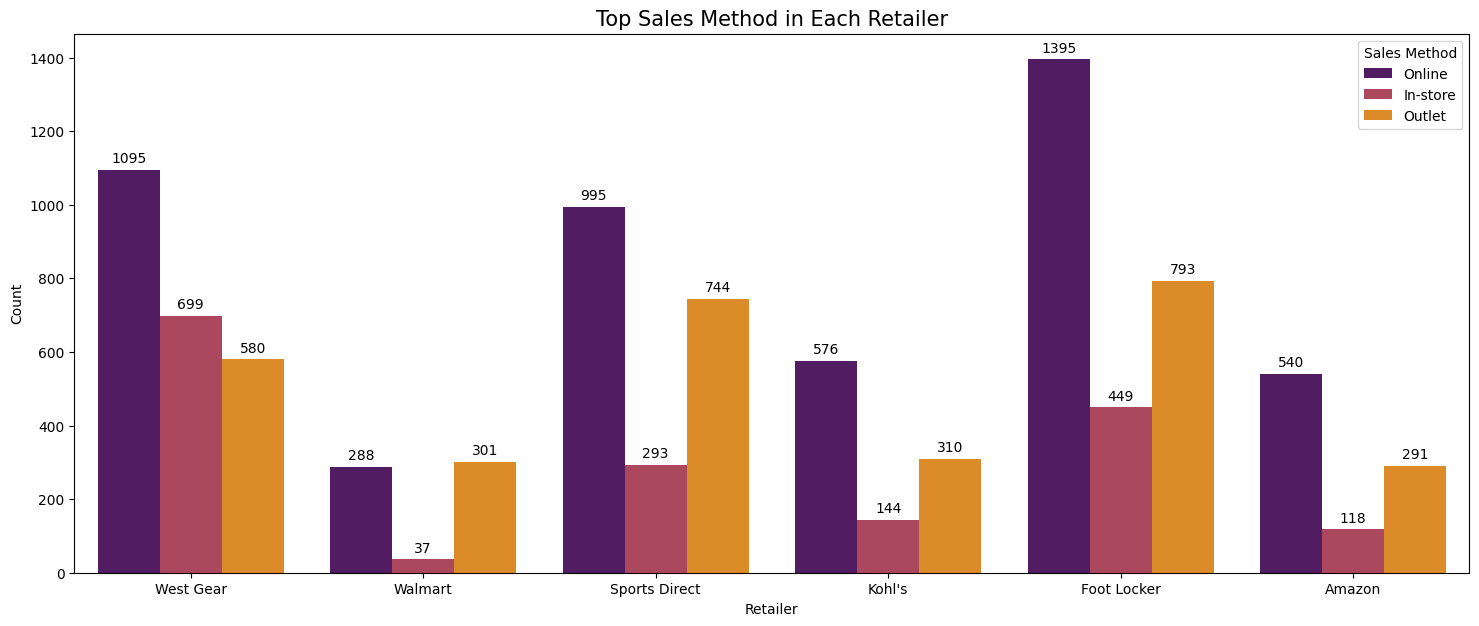

In [40]:
# Plotting
plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Retailer', y='Count', hue='Sales Method', data=best_sales_method, palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)

plt.title(f'Top Sales Method in Each Retailer', fontsize=15)
plt.show()

# **Sales Forecast w/ Arima, Sarima, & ExponentialSmoothing Holt-Winters**

In [41]:
grouped_data = df.groupby('Date')['Total Sales'].sum().reset_index()
grouped_data['Date'] = pd.to_datetime(grouped_data['Date'])
grouped_data

,Date,Total Sales
0,2020-01-01,845141.0
1,2020-01-02,689410.0
2,2020-01-03,632573.0
3,2020-01-04,615080.0
4,2020-01-05,707829.0
...,...,...
719,2021-12-27,602353.0
720,2021-12-28,301010.0
721,2021-12-29,211109.0
722,2021-12-30,167903.0


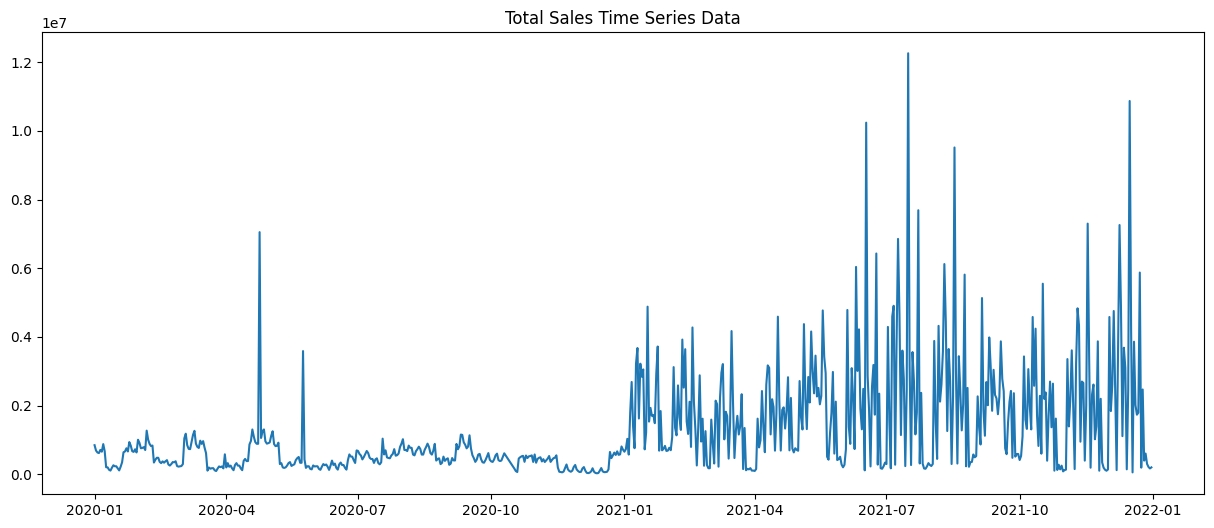

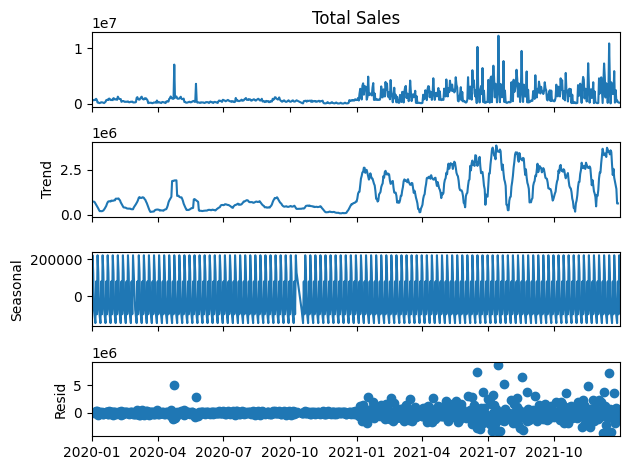

c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                  579
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8860.198
Date:                Mon, 11 Mar 2024   AIC                          17732.396
Time:                        09:09:34   BIC                          17758.553
Sample:                             0   HQIC                         17742.596
                                - 579                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7643      0.030    -25.300      0.000      -0.823      -0.705
ar.L2         -0.6797      0.034    -19.781      0.000      -0.747      -0.612
ar.L3         -0.4128      0.033    -12.519      0.0

c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          Total Sales   No. Observations:                  579
Model:             SARIMAX(5, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -8753.414
Date:                              Mon, 11 Mar 2024   AIC                          17520.828
Time:                                      09:09:35   BIC                          17551.198
Sample:                                           0   HQIC                         17532.681
                                              - 579                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7493      0.063    -11.965      0.000      -0.872      -0.627
ar.L2         -0.66

c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

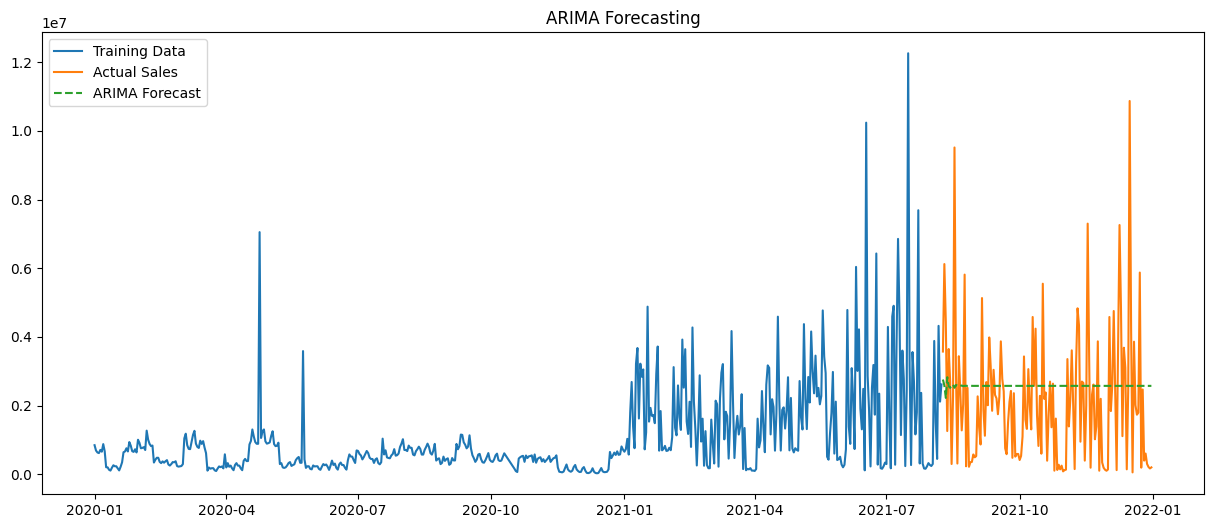

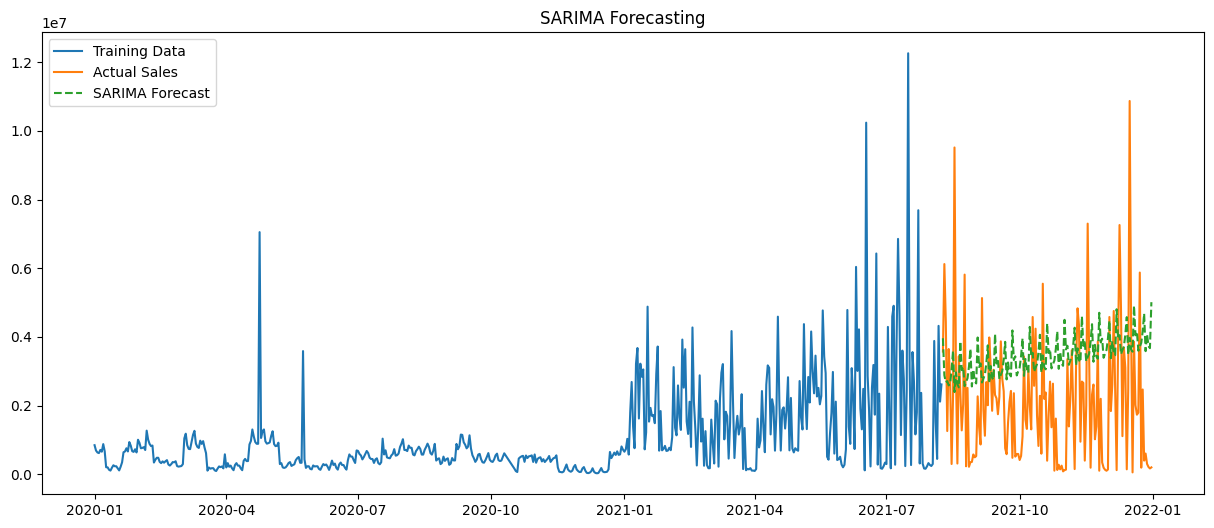

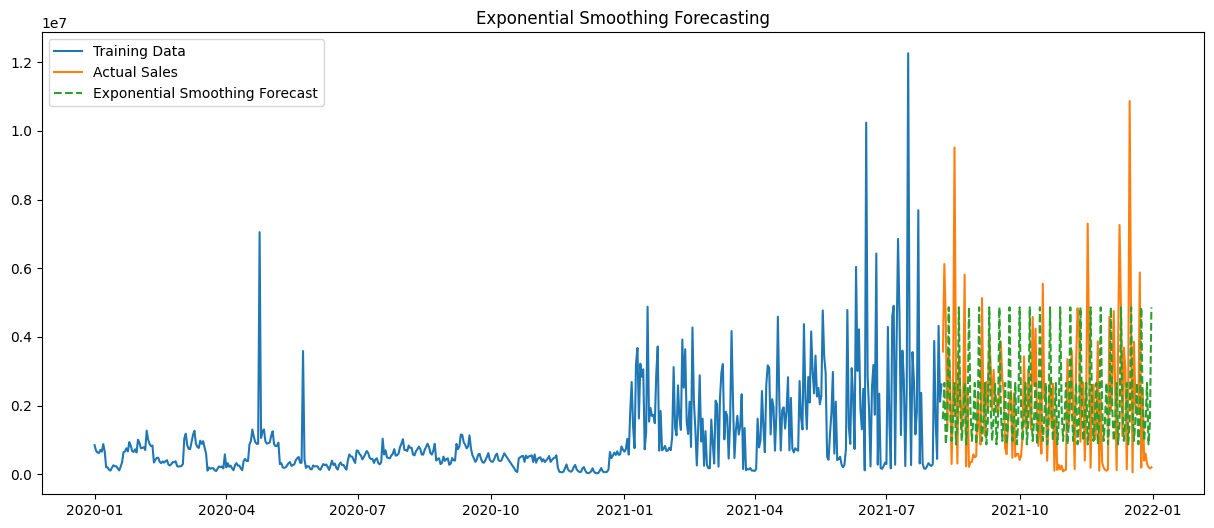

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

date_sales_data = grouped_data.set_index('Date')
plt.figure(figsize=(15, 6))
plt.plot(date_sales_data['Total Sales'])
plt.title('Total Sales Time Series Data')
plt.show()

# Decompose the time series data to understand its components
result = seasonal_decompose(date_sales_data['Total Sales'], model='additive', period=7)  # Adjusted period
result.plot()
plt.show()

# Define the training and testing sets
train_size = int(len(date_sales_data) * 0.8)
train, test = date_sales_data[:train_size], date_sales_data[train_size:]

# ARIMA model
order = (5, 1, 0)  # You may need to adjust these parameters based on your data and analysis
arima_model = ARIMA(train, order=order)
arima_fit = arima_model.fit()
print(arima_fit.summary())
# Forecasting with ARIMA
arima_forecast = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# SARIMA model
seasonal_order = (0, 1, 1, 12)  # You may need to adjust these parameters based on your data and analysis
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())
# Forecasting with SARIMA
sarima_forecast = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Exponential Smoothing model
exponential_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=7)  # Adjusted parameters
exponential_fit = exponential_model.fit()
print(exponential_fit.summary())
# Forecasting with Exponential Smoothing
exponential_forecast = exponential_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot the ARIMA forecast
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Total Sales'], label='Training Data')
plt.plot(test.index, test['Total Sales'], label='Actual Sales')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='dashed')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

# Plot the SARIMA forecast
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Total Sales'], label='Training Data')
plt.plot(test.index, test['Total Sales'], label='Actual Sales')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='dashed')
plt.title('SARIMA Forecasting')
plt.legend()
plt.show()

# Plot the Exponential Smoothing forecast
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Total Sales'], label='Training Data')
plt.plot(test.index, test['Total Sales'], label='Actual Sales')
plt.plot(test.index, exponential_forecast, label='Exponential Smoothing Forecast', linestyle='dashed')
plt.title('Exponential Smoothing Forecasting')
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# ARIMA
mae_arima = mean_absolute_error(test['Total Sales'], arima_forecast)
print(f'MAE for ARIMA: {mae_arima}')

# SARIMA
mae_sarima = mean_absolute_error(test['Total Sales'], sarima_forecast)
print(f'MAE for SARIMA: {mae_sarima}')

# Exponential Smoothing
mae_exponential = mean_absolute_error(test['Total Sales'], exponential_forecast)
print(f'MAE for Exponential Smoothing: {mae_exponential}')

# ARIMA
mse_arima = mean_squared_error(test['Total Sales'], arima_forecast)
print(f'MSE for ARIMA: {mse_arima}')

# SARIMA
mse_sarima = mean_squared_error(test['Total Sales'], sarima_forecast)
print(f'MSE for SARIMA: {mse_sarima}')

# Exponential Smoothing
mse_exponential = mean_squared_error(test['Total Sales'], exponential_forecast)
print(f'MSE for Exponential Smoothing: {mse_exponential}')

rmse_arima = np.sqrt(mse_arima)
rmse_sarima = np.sqrt(mse_sarima)
rmse_exponential = np.sqrt(mse_exponential)

print(f'RMSE for ARIMA: {rmse_arima}')
print(f'RMSE for SARIMA: {rmse_sarima}')
print(f'RMSE for Exponential Smoothing: {rmse_exponential}')


MAE for ARIMA: 1513423.0591785987
MAE for SARIMA: 2032261.0393489825
MAE for Exponential Smoothing: 1760107.4265754463
MSE for ARIMA: 3757834518143.952
MSE for SARIMA: 5929796040358.019
MSE for Exponential Smoothing: 5378670010677.431
RMSE for ARIMA: 1938513.481548156
RMSE for SARIMA: 2435117.2539239293
RMSE for Exponential Smoothing: 2319195.9836713737


c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


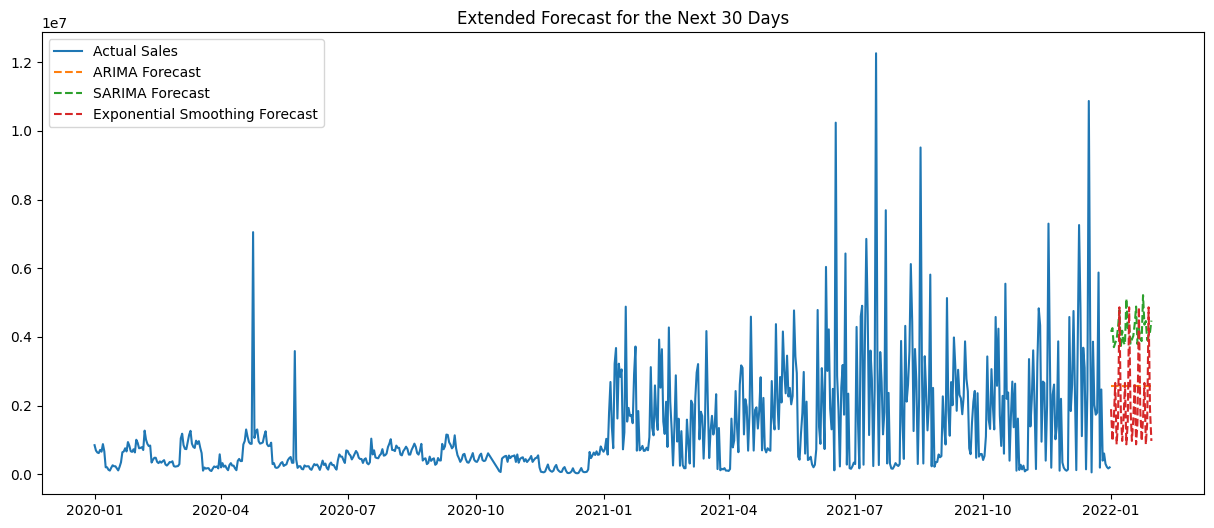

In [44]:
# Extend the time index for the next 30 days
forecast_index = pd.date_range(start=date_sales_data.index[-1] + pd.DateOffset(1), periods=30, freq='D')

# ARIMA forecast for the next 30 days
arima_future_forecast = arima_fit.predict(start=len(date_sales_data), end=len(date_sales_data) + 29, typ='levels', alpha=0.05)

# SARIMA forecast for the next 30 days
sarima_future_forecast = sarima_fit.predict(start=len(date_sales_data), end=len(date_sales_data) + 29, typ='levels', alpha=0.05)

# Exponential Smoothing forecast for the next 30 days
exponential_future_forecast = exponential_fit.predict(start=len(date_sales_data), end=len(date_sales_data) + 29)

# Plot the extended forecasts with Exponential Smoothing
plt.figure(figsize=(15, 6))
plt.plot(date_sales_data.index, date_sales_data['Total Sales'], label='Actual Sales')
plt.plot(forecast_index, arima_future_forecast, label='ARIMA Forecast', linestyle='dashed')
plt.plot(forecast_index, sarima_future_forecast, label='SARIMA Forecast', linestyle='dashed')
plt.plot(forecast_index, exponential_future_forecast, label='Exponential Smoothing Forecast', linestyle='dashed')
plt.title('Extended Forecast for the Next 30 Days')
plt.legend()
plt.show()

# **Conclusion**

1. The results shows that the performance of Adidas products in the United States is evaluated based on Units Sold, Total Sales, and Operating Profit. Men's Street Footwear emerges as the best-selling product with 593,320 units sold. On the other hand, Men's Apparel is the least popular product with only 30,683 units sold. Additionally, Men's Street Footwear stands out with the highest sales and profit, amounting to $208,826,244.00 and $82,802,260.62, respectively.

2. The overall trend in Adidas sales in the US over the specified month-wise and year-wise analysis indicates that, on a month-wise basis, both sales and profit exhibit a fluctuating pattern. July emerges as the best-performing month and August based on profit, while March stands out as the least favorable. On a year-wise analysis, sales and profit in 2021 show improvement compared to 2020.

3. Based on Units Sold, Adidas products are predominantly sold through Gear Wear, except for Men's Street Footwear, which sees the highest sales through Foot Locker. In terms of profit, Foot Locker contributes the highest profit for Men's Street Footwear. Sports Direct leads in profit for Women's Apparel, while Gear Wear tops the list for Women's Street Footwear, Women's Athletic Footwear, Men's Athletic Footwear, and Men's Apparel.

4. The cities that contribute the most to Adidas sales in the US are Charleston, New York, and San Francisco, while the leading states are New York, California, and Florida. Additionally, the West region stands out as the top-performing region for Adidas sales in the US. Men's Street Footwear exhibits the highest sales in every region except the South, where Men's Apparel takes the lead as the best-selling product.

5. Overall, the correlation matrix suggests strong positive correlations between all three variables. This means that as Units Sold, Total Sales, and Operating Profit increase, the other two variables tend to increase as well. Here's a breakdown of the specific correlations:
    - Units Sold and Total Sales: The correlation coefficient of 0.98 indicates a very strong positive correlation. This means that as the number of units sold increases, the total sales amount also increases, and vice versa.
    - Total Sales and Operating Profit: The correlation coefficient of 0.96 also suggests a very strong positive correlation. This implies that as total sales increase, operating profit also tends to increase, and vice versa.
    - Units Sold and Operating Profit: The correlation coefficient of 0.91 represents a strong positive correlation. This suggests that as the number of units sold increases, operating profit also tends to increase, although not as strongly as the correlation between Total Sales and Operating Profit.

6. Online is the most prevalent sales method used by Adidas, this is likely due to the increasing popularity of online shopping among consumers. In-store is the second most common sales method used by Adidas, this is likely due to the convenience of shopping at physical stores and the opportunity to try products on directly. Outlets are the least common sales method for Adidas, this is likely due to the lower prices at outlets, which may attract bargain-hunting consumers.



# **Suggestions (Based  on Conclusions)**
**1. Sales and Profit Optimization Based on Best-Least Product**

By observing that Men's Street Footwear emerges as the best-selling product and Men's Apparel is the least popular, Adidas can focus on marketing strategies and boosting sales for these products. This may involve:
    
**for Men's Street Footwear (Best-Selling):**
- Keep Men's Street Footwear fresh with innovative designs and collaborations.
- Launch limited editions to create exclusivity and drive demand.
- Develop targeted campaigns emphasizing unique features.
- Implement exclusive loyalty programs for Men's Street Footwear buyers.
- Explore variations within Men's Street Footwear for market diversity.

**for Men's Apparel (Least Popular):**
- Revamp Men's Apparel with new styles aligned with trends.
- Create promotions bundling Men's Apparel with other products.
- Develop strategies to appeal to a broader audience.
- Introduce limited-time discounts to boost Men's Apparel sales.

**2. Month and Year (wise) Optimization**

Adidas should align marketing strategies with seasonal trends, implementing targeted campaigns and managing inventory effectively to address the month-wise fluctuations observed in sales and profit. Specifically, focusing on peak months like July can capitalize on increased consumer activity. For year-wise improvements, the brand should analyze successful factors contributing to the growth in 2021 and develop a strategic plan accordingly.

**3. Best Products at the Top Retailers**

Adidas can strategically enhance its performance across different retailers by tailoring approaches to each key partner. Firstly, with Gear Wear serving as the overall sales leader, Adidas should intensify collaboration by introducing exclusive releases and joint marketing initiatives. This concerted effort aims to broaden the consumer reach and solidify the brand's presence in the market. Simultaneously, with Foot Locker dominating in Men's Street Footwear sales, Adidas should capitalize on this success through exclusive collaborations. Such collaborations can not only sustain the demand for Men's Street Footwear but also attract Foot Locker's specific customer base, creating a mutually beneficial relationship. Additionally, recognizing Sports Direct as the leader in Women's Apparel profitability, Adidas should prioritize collaborative efforts to optimize the Women's Apparel product line.

**4. Regionalized Triumph: Tailored Strategies for Adidas Sales in US**

Each location represents diverse consumer preferences and lifestyles, necessitating tailored marketing approaches. For instance, New York may benefit from exclusive collections and dynamic in-store experiences, while California could focus on active lifestyle campaigns. In Florida, season-specific promotions emphasizing athleisure wear for warm climates may be key. The West region's success indicates an opportunity for Adidas to tap into the innovation-driven and outdoor-focused culture, introducing technologically advanced sports gear. Additionally, in the South, where Men's Apparel leads in sales, a strategic emphasis on expanding and promoting this product line can enhance overall performance. This region-specific approach enables Adidas to strengthen its market presence, cater to diverse consumer demands, and sustain success across key cities, states, and regions in the United States.

**5. Capitalize Units Sold, Sales, and Profit Correlations**

To capitalize on these correlations, a strategic focus on driving Units Sold becomes pivotal. This could involve targeted marketing campaigns, product promotions, and enhanced distribution channels to stimulate sales growth. Furthermore, given the robust connection between Total Sales and Operating Profit, a holistic approach to revenue generation and cost management is essential. Strategies that optimize pricing, streamline operational efficiency, and leverage economies of scale can contribute to maximizing both Total Sales and Operating Profit. The correlation between Units Sold and Operating Profit, though slightly less strong, still underscores the importance of operational efficiency in converting sales into profitability. In essence, a comprehensive strategy that aligns marketing efforts with driving sales, while concurrently optimizing operational aspects, can harness these correlations for sustained business success.

**6. Improve and Optimize Sales Method**

To leverage this prevalent method, continuous enhancements to the online shopping experience, such as user-friendly interfaces, personalized recommendations, and efficient order processing, can be implemented. Additionally, targeted digital marketing campaigns and exclusive online promotions can further capitalize on the popularity of e-commerce, engaging with consumers and driving online sales growth. While online sales dominate, the acknowledgment of in-store shopping as the second most common method highlights the enduring importance of physical retail spaces. Adidas can optimize this channel by prioritizing an immersive in-store experience, incorporating innovative technologies like augmented reality for virtual try-ons, and organizing exclusive in-store events to attract foot traffic. Furthermore, emphasizing the seamless integration of online and in-store experiences, such as click-and-collect services and online-exclusive products available for in-store purchase, can create a cohesive shopping journey for consumers. Lastly, for outlets, exploring strategies to highlight the unique value proposition of outlet purchases, such as exclusive discounts or limited-edition releases, may attract bargain-seeking customers and increase the appeal of this sales channel.

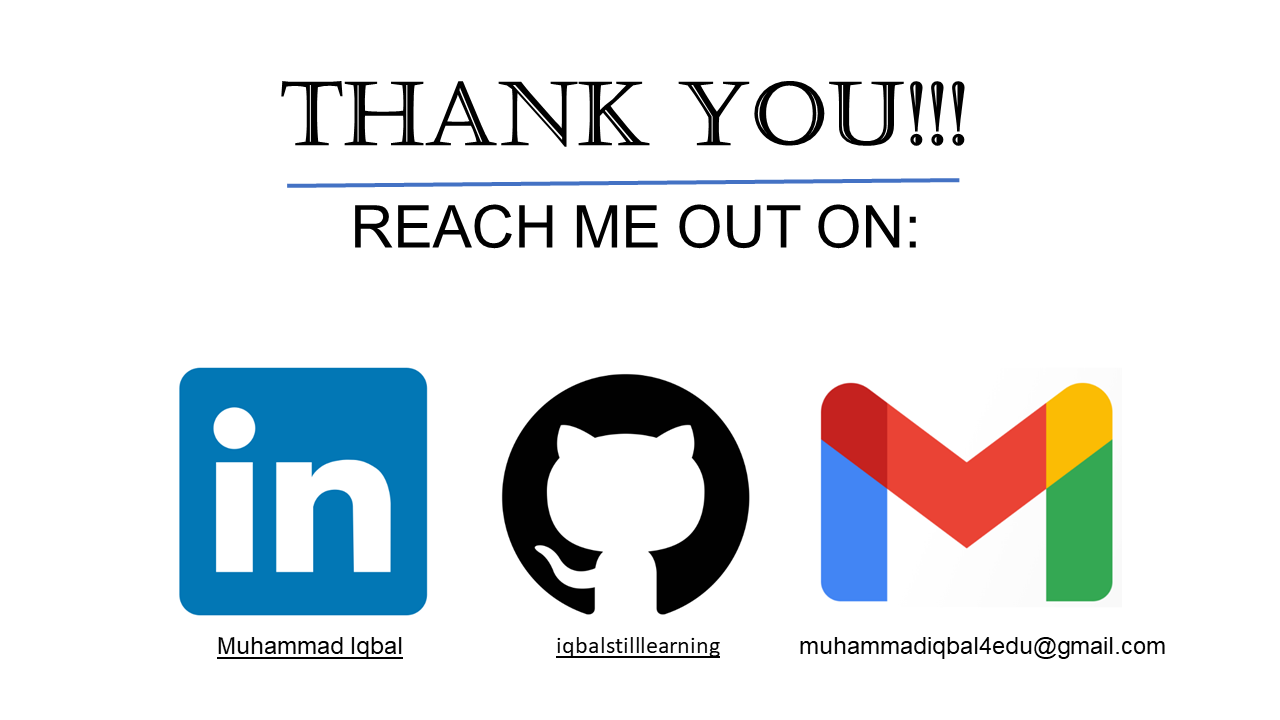

**Links: [[Linkedin](https://www.linkedin.com/in/muhammadiqbal-/)] [[Github](https://github.com/iqbalstilllearning/)] [[Gmail](muhammadiqbal4edu@gmail.com)]**